In [90]:
import numpy as np
import pandas as pd
import coupled_LDS
import scipy.stats as stats
import scipy.linalg
from utils import *
import matplotlib.pyplot as plt
from plotting_utils import *
import autograd.numpy as anp 
import os
from sippy_unipi import *
from sklearn.linear_model import LinearRegression
import scipy.linalg as sl
from coupled_LDS import *
from EI_subspace_RNN import * 

K1 = 3
K2 = 3

# Generate EI RNN

In [91]:
U = 1000
T = 100
K = K1 + K2
D = 50
M = 2
N_e = D * 2 # number of units in the RNN
N_i = D * 2
N = N_e + N_i
sparsity = 0.25     
N_weights = int (N * N * sparsity)

LDS = coupled_LDS(D, K1, K2, M)    
# generate known inputs 
u = LDS.generate_inputs(U,T)

        

In [95]:
np.random.seed(52)
G = np.random.normal(0, 1, (D,D))
G, _ = np.linalg.qr(G)  # QR decomposition, Q is the orthogonal matrix
Um = G[:,:K1] # D x K1 orthogonal matrix
Um_n = G[:,:K2] # D x K2 orthogonal matrix, K2 <= K1
print(G[:,K2:K1].shape)
print(G[:,K1:K1+K2].shape)
Un = np.concatenate([G[:,K2:K1],G[:,K1:K1+K2]], axis=1)

# print(np.linalg.matrix_rank(Um))
# print(np.linalg.matrix_rank(Un))
# print(np.linalg.matrix_rank(Um_n))
# print(np.linalg.matrix_rank(np.concatenate([Un,Um], axis=1)))

Mw = np.zeros((D,K1))
Nw = np.zeros((D,K1))

# sample independent columns of M based on U_m
for i in range(K1):
    np.random.seed(2*i)
    alphas = np.random.uniform(0,1,size=K1).reshape((1,K1))
    Mw[:,i] = (alphas @ Um.T).flatten() / np.sum(alphas)

    np.random.seed(2*i+1)
    betas = np.random.uniform(0,1,size=K1).reshape((1,K1))
    Nw[:,i] = (alphas @ Un.T).flatten() / np.sum(betas)

print(np.linalg.matrix_rank(Mw))
print(np.linalg.matrix_rank(Nw))
print(np.linalg.matrix_rank(np.concatenate([Mw,Um], axis=1)))
print(np.linalg.matrix_rank(np.concatenate([Nw,Un], axis=1)))
print(np.linalg.matrix_rank(np.concatenate([Mw,Nw], axis=1)))



(50, 0)
(50, 3)
3
3
3
3
6


In [96]:
true_A = np.zeros((K1+K2,K1+K2))
true_A[:K1,:K1] = Un.T @ Mw @ Nw.T @ Un # A11
true_A[K1:,:K1] = Um_n.T @ Mw @ Nw.T @ Un # A21

# Generate Low-Rank RNN

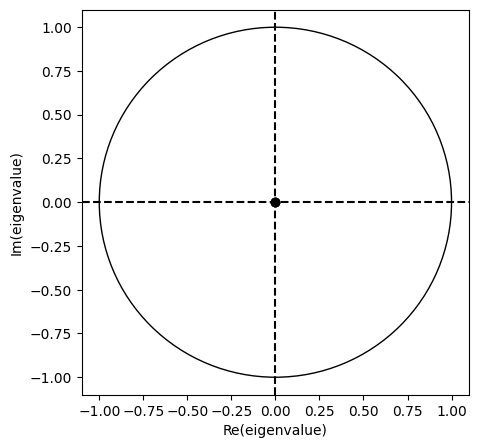

In [97]:
fig, axes = plt.subplots(figsize=(5,5))
plot_eigenvalues(axes, np.linalg.eigvals(true_A[:K1,:K1]),[])